In [1]:
%load_ext autoreload
%autoreload 2

#%config IPCompleter.greedy=True

# Rotation curves

First, imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os
import astropy.units as u
from astropy.constants import G

import snapshot_obj 
import dataset_compute
import trace_halo
import curve_fit

import importlib

In [3]:
importlib.reload(snapshot_obj)
importlib.reload(curve_fit)
importlib.reload(dataset_compute)

<module 'dataset_compute' from '/home/kassiili/Curvaton_Simulations/analysis/dataset_compute.py'>

## Get data

In [4]:
# Which halo:
gn = 1; sgn = 2

# Get LCDM data:
snap_pres = snapshot_obj.Snapshot("CDM_V1_LR",127)

In [5]:
# Trace halo:
step = 4
stop = 101
tracer = trace_halo.trace_halo(snap_pres,gn,sgn,direction='backwards',stop=stop)

find match for: 1.0 2.0  in  126
idx= 2
idx= 3
idx= 1
idx= 4
idx= 0
idx= 5
idx= -1
idx= 6
idx= -2
idx= 7
idx= -3
idx= 8
idx= -4
idx= 9
idx= -5
idx= 10
idx= -6
idx= 11
idx= -7
idx= 12
idx= -8
idx= 13
idx= -9
idx= 14
idx= -10
idx= 15
idx= -11
idx= 16
idx= -12
idx= 17
idx= -13
idx= 18
idx= -14
idx= 19
idx= -15
idx= 20
idx= -16
idx= 21
idx= -17
idx= 22
idx= -18
idx= 23
idx= -19
idx= 24
idx= -20
idx= 25
idx= -21
idx= 26
idx= -22
idx= 27
idx= -23
idx= 28
idx= -24
idx= 29
idx= -25
idx= 30
idx= -26
idx= 31
idx= -27
idx= 32
idx= -28
idx= 33
idx= -29
idx= 34
idx= -30
idx= 35
idx= -31
idx= 36
idx= -32
idx= 37
idx= -33
idx= 38
idx= -34
idx= 39
idx= -35
idx= 40
idx= -36
idx= 41
idx= -37
idx= 42
idx= -38
idx= 43
idx= -39
idx= 44
idx= -40
idx= 45
idx= -41
idx= 46
idx= -42
idx= 47
idx= -43
idx= 48
idx= -44
idx= 49
idx= -45
idx= 50
idx= -46
idx= 51
idx= -47


In [6]:
# Compute rotation curves:

rotationCurves = {}
reduced = { key : val for key,val in tracer.items() \
         if key in range(127,127-len(tracer)+1,-step)}
for snapID,data in reduced.items():
#    if snapID == 115 or snapID == 103:
#        continue
    z = data[0]; gn = data[1]; sgn = data[2]
    snap = snapshot_obj.Snapshot("CDM_V1_LR",snapID)
    
    # Read halo:
    fnum = snap.file_of_halo(gn,sgn)
    SGNs = snap.get_subhalos("SubGroupNumber",fnums=[fnum])
    GNs = snap.get_subhalos("GroupNumber",fnums=[fnum])
    
    vmax = snap.get_subhalos("Vmax",fnums=[fnum]) / 100000 
                                                        # cm/s to km/s 
    rmax = snap.get_subhalos("VmaxRadius",fnums=[fnum]) \
                * u.cm.to(u.kpc)
    
    # Select halo:
    halo_mask = np.logical_and(SGNs == sgn,GNs == gn)
    vmax = vmax[halo_mask]
    rmax = rmax[halo_mask]
    
    # Rotation curve:
    print(snapID)
    r, v_circ = dataset_compute.compute_rotation_curve(snap, gn, sgn)
    r = r * u.cm.to(u.kpc)
    v_circ = v_circ * u.cm.to(u.km)
    rotationCurves[snapID] = (r,v_circ,z)

No handles with labels found to put in legend.


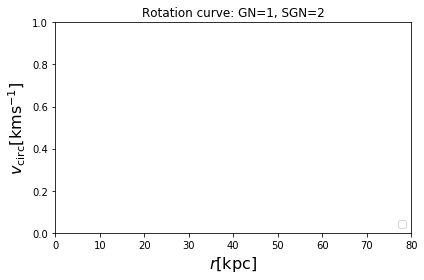

In [7]:
fig, axes = plt.subplots()

# Set axes:
#axes.set_xscale('log')
#axes.set_yscale('log')
axes.set_xlim(0,80)
#axes.set_ylim(y_down,y_up)

# Set labels:
axes.set_xlabel('$r[\mathrm{kpc}]$', fontsize=16)
axes.set_ylabel('$v_{\mathrm{circ}}[\mathrm{kms^{-1}}]$', fontsize=16)

# Galaxy text:
axes.set_title('Rotation curve: GN={}, SGN={}'.format(gn,sgn))

step = 4
toolight = int(len(rotationCurves)/4)
colors = plt.cm.Blues(np.linspace(0,1,len(rotationCurves) + toolight))[toolight:]

for i,xy in enumerate(rotationCurves.values()):
    axes.plot(xy[0], xy[1], label='z={:06.4f}'.format(xy[2]), c=colors[i])
    
plt.legend(loc='lower right')
plt.tight_layout()